# IND320 Project work - Part 1

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Reading CSV file

In [ ]:
# 1) Load the CSV from disk into a pandas DataFrame.
#    (Change the path to wherever your CSV actually lives.)
df = pd.read_csv("/Users/larssolbakken/Documents/Github/Ind320-Lars/open-meteo-subset.csv")

# 2) Parse the 'time' column from text into real datetimes.
#    - errors='coerce' turns any bad/unreadable value into NaT (pandas' "missing datetime")
#    - This does NOT change the index yet; it only converts the column's dtype.
df['time'] = pd.to_datetime(df['time'], errors='coerce')  # parse

# 3) Prepare the DataFrame for time-based work and plotting:
#    - dropna(subset=['time']): remove rows where 'time' failed to parse (NaT)
#    - set_index('time'): make 'time' the index (so df.index is a DatetimeIndex)
#    - sort_index(): ensure chronological order (important for clean plots/resampling)
df = df.dropna(subset=['time']).set_index('time').sort_index()

# 4) Show the resulting DataFrame (now indexed by datetime and sorted).
df

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...
2020-12-30 19:00:00,-6.5,0.0,1.6,4.0,58
2020-12-30 20:00:00,-7.0,0.0,1.2,3.4,50
2020-12-30 21:00:00,-7.5,0.0,1.1,2.4,22


## Printing content 

In [280]:

# Shape and dtypes
print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

# Head/tail preview
print("\nHead:")
display(df.head())
print("\nTail:")
display(df.tail())

# Missing values per column
print("\nMissing values per column:")
print(df.isna().sum())

# Basic descriptive stats for numeric columns
print("\nDescribe (numeric):")
display(df.describe())

# If you want unique counts for categoricals:
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
if cat_cols:
    print("\nCategorical columns and #unique values:")
    for c in cat_cols:
        print(f"- {c}: {df[c].nunique()} unique")

Shape: (8760, 5)

Dtypes:
temperature_2m (°C)       float64
precipitation (mm)        float64
wind_speed_10m (m/s)      float64
wind_gusts_10m (m/s)      float64
wind_direction_10m (°)      int64
dtype: object

Head:


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284



Tail:


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-12-30 19:00:00,-6.5,0.0,1.6,4.0,58
2020-12-30 20:00:00,-7.0,0.0,1.2,3.4,50
2020-12-30 21:00:00,-7.5,0.0,1.1,2.4,22
2020-12-30 22:00:00,-7.2,0.0,0.6,1.6,22
2020-12-30 23:00:00,-7.5,0.0,0.5,0.7,8



Missing values per column:
temperature_2m (°C)       0
precipitation (mm)        0
wind_speed_10m (m/s)      0
wind_gusts_10m (m/s)      0
wind_direction_10m (°)    0
dtype: int64

Describe (numeric):


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


## Plotting the Data

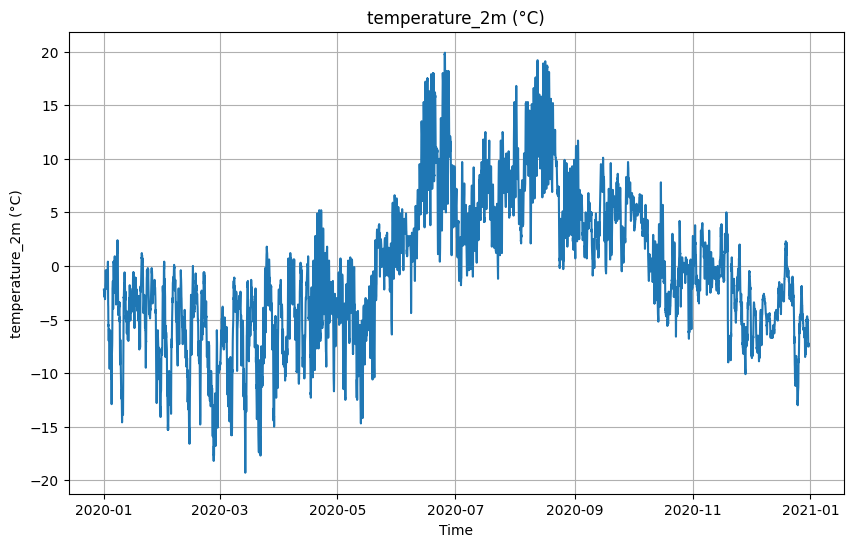

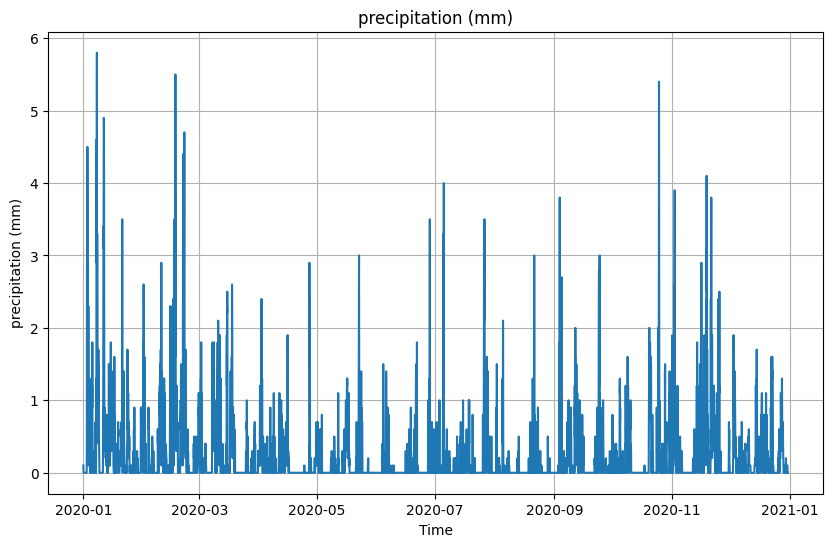

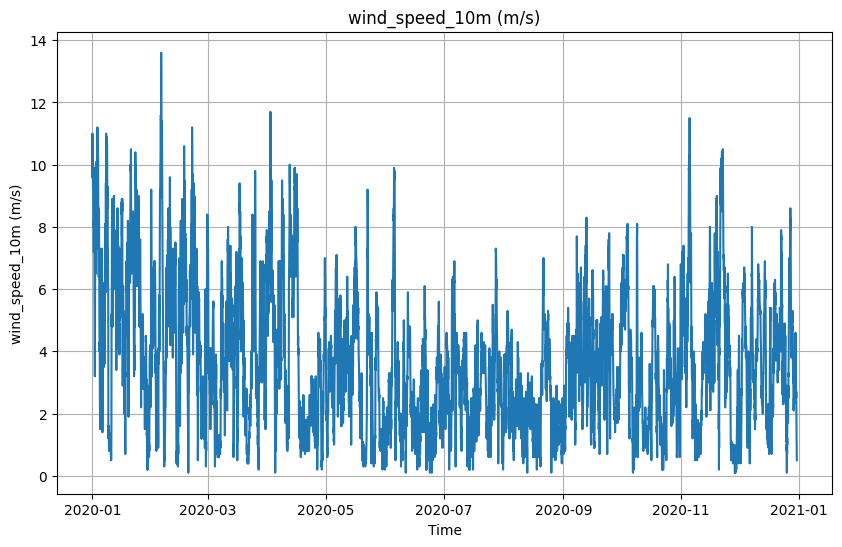

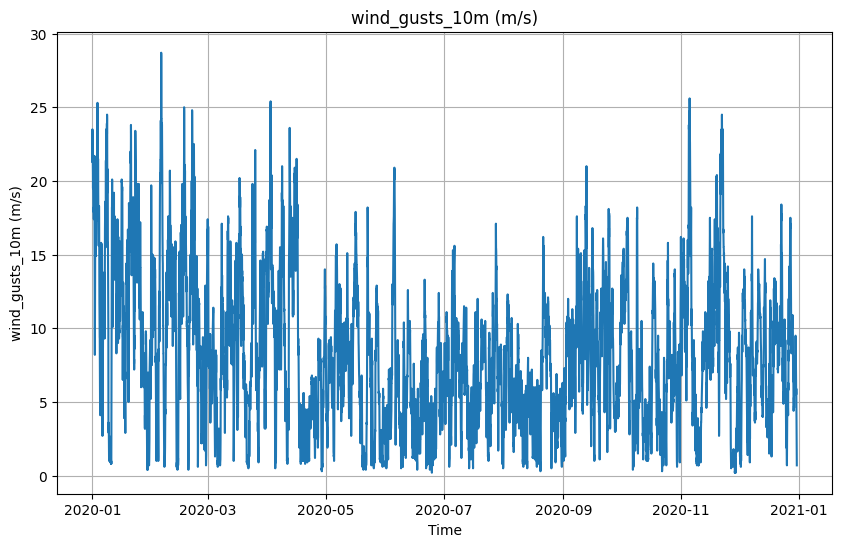

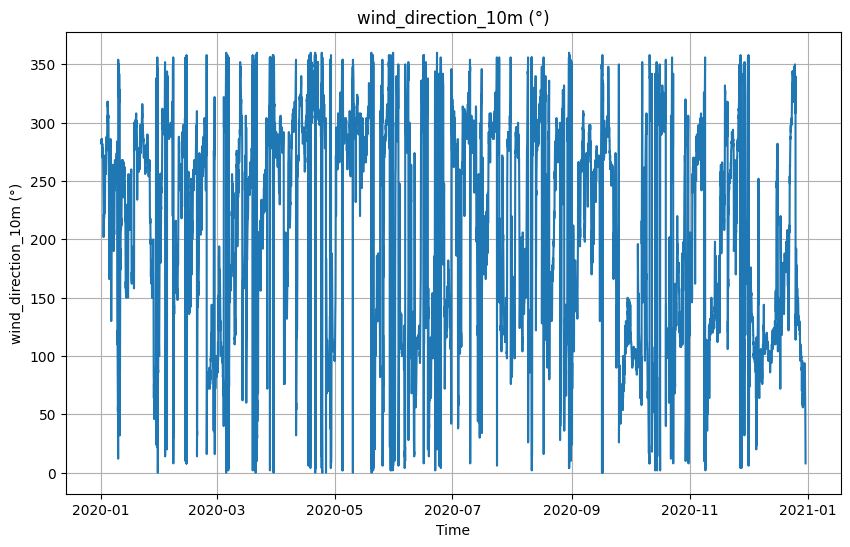

In [281]:
# Pick all columns whose dtype is numeric (ints/floats). These are plottable as lines.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# If there are no numeric columns, explain why nothing gets plotted.
if not numeric_cols:
    print("No numeric columns found to plot.")
else:
    # Loop over each numeric column and make one figure per column
    for col in numeric_cols:
        plt.figure()  # start a new figure so each column has its own plot

        # Plot this column against the DataFrame's index.
        # NOTE: If df.index is a DatetimeIndex, the x-axis will show dates.
        #       If it's a RangeIndex (0..N), you'll see integer positions instead of dates.
        plt.plot(df.index, df[col])

        # Use the column name as the title (simple, descriptive)
        plt.title(f"{col}")

        # Label the x-axis. If your index is time, you can rename it to 'time' or set it as a datetime index.
        plt.xlabel("Time")

        # Label the y-axis with the column name (units if applicable)
        plt.ylabel(col)

# Format x-axis to show months if index is datetime


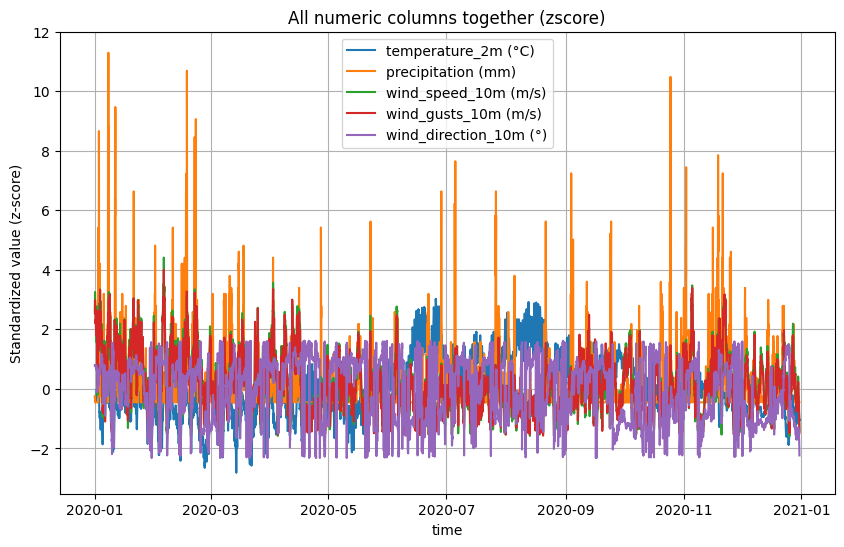

In [282]:


# We only proceed if there are numeric columns to plot
if numeric_cols:
    # Work on a copy so we don't modify the original df unintentionally
    data = df[numeric_cols].copy()

    # Standardize each numeric column using z-scores:
    # subtract the column mean and divide by the column std (ddof=0 = population std).
    # This puts different units (e.g., °C, mm, m/s) on a comparable scale (mean=0, std=1).
    data = (data - data.mean()) / data.std(ddof=0)
    y_label = "Standardized value (z-score)"  # y-axis label to reflect z-scores

    # Create a new matplotlib figure
    plt.figure()
    # Plot each standardized column as its own line on the same axes
    for col in data.columns:
        # x-axis: data.index (dates if df has a DatetimeIndex; otherwise plain index)
        # y-axis: standardized values for this column
        plt.plot(data.index, data[col], label=col)

    # Title includes the chosen 'method' string from your surrounding code
    plt.title(f"All numeric columns together ({method})")
    # Use the index name as x-label if it exists; otherwise fall back to "Index"
    plt.xlabel("Index" if df.index.name is None else df.index.name)
    # Label the y-axis with what we plotted (z-scores)
    plt.ylabel(y_label)
    # Show a legend so each line can be identified by its column name
    plt.legend()
    # Render the plot
    plt.show()
else:
    # If there are no numeric columns, explain why nothing was plotted
    print("No numeric columns to plot together.")

## Log and AI usage

At the beginning of the project, I set up the GitHub repository and a minimal Streamlit app to ensure deployment worked. In the Jupyter Notebook, I started by reading the supplied CSV file with Pandas, inspecting the shape, dtypes, and first rows to understand the structure. I plotted each numeric column separately and then all together. Since the variables had very different scales (e.g., temperature, precipitation, wind speed, wind direction), I quickly saw the need for normalization. Wind direction also gave misleading plots, which I solved by excluding it or placing it on a secondary axis.

Moving to Streamlit, I structured the app into four pages. On the home page I placed the navigation menu and a short introduction. On the second page, I built a table where each row represented one variable, and I used LineChartColumn to display the first month of the data. Getting the list-of-values structure right for the sparklines was a key step. On the third page, I implemented plotting with a selectbox to choose one column or all, and a slider to choose month range. I added a checkbox for normalization to make comparisons clearer across variables. On the fourth page, I included this project log and a description of AI usage.

In this project I used AI mostly as a first draft generator. For each task, I asked AI for suggestions on how I could solve it, for example how to set up multipage structure in Streamlit or how to build a LineChartColumn table. I then went through the code and explanations carefully, tested them, and adjusted the solution so it fit the assignment requirements. In many cases, the AI output was not exactly what I wanted, so I had to modify it, combine parts, or ask follow-up questions. I also used AI to explain concepts and functions step by step, since I sometimes found the assignment text unclear or contradictory. In that way AI functioned both as a tutor and as a draft assistant, while the final implementation and understanding were my responsibility.

## Links to GitHub 

GitHub repository link:

Streamlit app link: 